In [1]:
import pandas as pd

In [67]:
rawData1 = pd.read_csv("./myData/rawCorpus.csv")
rawData2 = pd.read_csv("./myData/rawCorpus1.csv")
rawData3 = pd.read_csv("./myData/rawCorpus2.csv")
rawData = pd.concat([rawData1,rawData2],axis=0)
rawData = pd.concat([rawData,rawData3],axis=0)
rawData.sort_values(by='creatTime', ascending=True, inplace=True)  #按时间升续
dataMap = {}
for index,value in rawData.iterrows():
    title = value["title"]
    if title not in dataMap:
        dataMap[title] = []
        dataMap[title].append(value["readAmount"])
    else:
        dataMap[title].append(value["readAmount"])

In [68]:
len(dataMap)

97847

In [40]:
len(dataMap)
dataMap['乘客突发不适飞机掉头返回']

[100950.0,
 175142.0,
 334311.0,
 509111.0,
 646640.0,
 665942.0,
 700721.0,
 732564.0,
 727576.0,
 801831.0,
 716271.0,
 671931.0,
 585615.0,
 544392.0,
 524835.0,
 474045.0,
 512770.0,
 838726.0,
 433728.0,
 650935.0,
 416074.0,
 384550.0,
 628776.0,
 808880.0,
 575580.0,
 477632.0,
 641243.0,
 632598.0,
 570228.0,
 562455.0,
 549838.0,
 498439.0,
 504440.0,
 562576.0,
 544122.0,
 161203.0,
 130843.0,
 112895.0,
 103170.0,
 88520.0,
 82663.0,
 73898.0,
 69009.0,
 70459.0,
 68552.0,
 67347.0,
 61633.0]

In [43]:
DataY = []
DataX = []
for key,value in dataMap.items():
     if value==[]:
        continue
     if len(value) < 11:
        continue
     label = max(value)
     
     value.remove(label)
     num = len(value)
     if num <=4:
        continue
     DataX.append([key,value,num])
     DataY.append(label)

## 新的构造特征方法：取最值前面的10个（最靠近最值）点作为x

In [75]:
DataY = []
DataX0 = []
DataX = []
for key,value in dataMap.items():
     tmp = []
     if value == []:
         continue
     if len(value) < 11:
         continue
     label = max(value)
     #获得最大值位置，以便将最值之后的值都删去
     index = value.index(label)
     if index < 11:
         continue
     tmp = value[index-10:index]
     #value.remove(label)
     #num = len(value)
     DataX0.append([key,tmp])
     DataX.append(tmp)
     DataY.append(label)
     del tmp

In [70]:
len(DataY)

30329

In [76]:
DataX[:5]

[[304692.0,
  263212.0,
  248418.0,
  228792.0,
  205202.0,
  115213.0,
  156143.0,
  443581.0,
  322756.0,
  250033.0],
 [1235677.0,
  1162493.0,
  1126340.0,
  1041755.0,
  1117461.0,
  1107844.0,
  1231043.0,
  1520481.0,
  1379480.0,
  1178303.0],
 [980036.0,
  1188261.0,
  752500.0,
  244976.0,
  63290.0,
  64002.0,
  193114.0,
  589121.0,
  1495646.0,
  1720676.0],
 [921015.0,
  789487.0,
  740639.0,
  1137365.0,
  1074449.0,
  931609.0,
  1210781.0,
  1136188.0,
  1124978.0,
  1062110.0],
 [329400.0,
  329400.0,
  1900795.0,
  1900795.0,
  3710560.0,
  3710560.0,
  3523219.0,
  3523219.0,
  3664303.0,
  3664303.0]]

In [73]:
from sklearn.linear_model import LinearRegression

In [80]:
train_X = DataX[:24000]
train_Y = DataY[:24000]

model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)



In [96]:
val_x =DataX[24000:]
val_y = DataY[24000:]

<AxesSubplot:>

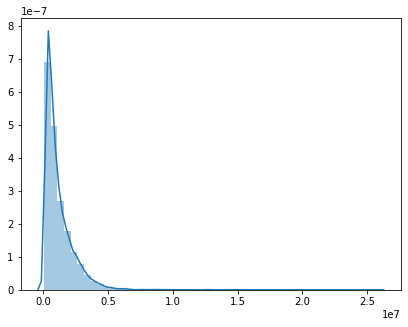

In [135]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_Y)


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer
scores = cross_val_score(model, X=train_X, y=train_Y, verbose=1, cv = 150, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.9s finished


In [95]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1,151)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8,cv9,cv10,...,cv141,cv142,cv143,cv144,cv145,cv146,cv147,cv148,cv149,cv150
MAE,166782.764102,186781.445689,160460.728907,170136.069133,164713.600247,158206.220283,192851.926455,175576.249915,153395.419222,140390.062159,...,239765.320665,276904.599569,204083.738236,223616.180653,190394.253073,357539.360273,388223.168062,348086.245793,356264.862343,225606.779192


In [97]:
mean_absolute_error(val_y, model.predict(val_x))

254423.36796029322

In [91]:
print('AVG:', np.mean(scores))

AVG: 240266.52679667025


In [98]:
from sklearn.model_selection import learning_curve, validation_curve

In [103]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), train_X, train_Y, cv=150, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring = make_scorer(mean_absolute_error))  

In [110]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5)):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from '/root/python/anaconda3/envs/py3_7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

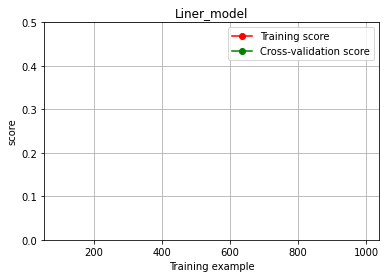

In [111]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_Y[:1000], ylim=(0.0, 0.5), cv=150, n_jobs=1)  

In [113]:
train_y_ln =[np.log(train_y + 1) for train_y in train_Y]
val_y_ln = [np.log(valy+1) for valy in val_y]

In [114]:
model = model.fit(train_X, train_y_ln)
mean_absolute_error(val_y_ln, model.predict(val_x))

0.3925622096735334

In [117]:
model.predict([val_x[0]])

array([13.09300983])

In [118]:
val_y_ln[0]

12.456932526075464

In [120]:
np.exp(13.09300983) - 1

485535.54170069454

<module 'matplotlib.pyplot' from '/root/python/anaconda3/envs/py3_7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

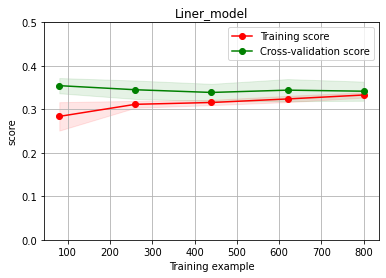

In [121]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

In [122]:
from sklearn.externals import joblib

/root/python/anaconda3/envs/py3_7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [124]:
joblib.dump(model, './model.pkl')

['./model.pkl']

In [125]:
new_model = joblib.load('./model.pkl')

In [127]:
result = new_model.predict(val_x)

In [128]:
re = [np.exp(res) - 1 for res in result]

In [129]:
re

[485535.540480776,
 601374.883997102,
 619831.3230350825,
 859946.8707458868,
 532938.488784225,
 674852.7506657722,
 489318.38268648065,
 782726.6033283598,
 537000.4699347742,
 802211.4052542284,
 983818.5200352917,
 538826.1130483502,
 560026.9371908737,
 1358023.4328743697,
 478166.71423146536,
 499759.84666932985,
 762860.1038533631,
 587263.0820005029,
 782462.1948541517,
 631451.9021199397,
 2342149.154543816,
 575141.1527724569,
 1082438.5476653113,
 481622.6744185339,
 545468.3070895954,
 486037.93951205036,
 1494937.8969416092,
 583735.828402289,
 832229.2518688345,
 662797.0905859602,
 656429.1061043118,
 546513.6765865902,
 596935.9195085681,
 5391678.307857316,
 675771.5983163413,
 619807.1910859832,
 568052.8565720035,
 611184.1330996294,
 542865.5463100336,
 511896.369356666,
 874835.5654754513,
 559435.0045658274,
 2199391.448315756,
 765907.9045769738,
 2067495.4433924851,
 543153.4323939736,
 559931.3201852217,
 540282.9467961878,
 568038.2851498672,
 479593.508508888

In [132]:
import sklearn
sklearn.__version__

'0.21.3'

In [134]:
np.__version__

'1.16.2'

In [133]:
val_x[:10]

[[190347.0,
  190347.0,
  243222.0,
  243222.0,
  256486.0,
  256486.0,
  230565.0,
  230565.0,
  220718.0,
  220718.0],
 [416072.0,
  416072.0,
  365288.0,
  365288.0,
  514784.0,
  514784.0,
  380499.0,
  380499.0,
  514604.0,
  514604.0],
 [363064.0,
  363064.0,
  500897.0,
  500897.0,
  378284.0,
  378284.0,
  560965.0,
  560965.0,
  533655.0,
  533655.0],
 [389113.0,
  389113.0,
  569002.0,
  569002.0,
  390671.0,
  390671.0,
  600863.0,
  600863.0,
  1233784.0,
  1233784.0],
 [277187.0,
  277187.0,
  331717.0,
  331717.0,
  318531.0,
  318531.0,
  342958.0,
  342958.0,
  332842.0,
  332842.0],
 [295903.0,
  295903.0,
  570175.0,
  570175.0,
  650933.0,
  650933.0,
  752953.0,
  752953.0,
  728410.0,
  728410.0],
 [192479.0,
  192479.0,
  192395.0,
  192395.0,
  226437.0,
  226437.0,
  226301.0,
  226301.0,
  240346.0,
  240346.0],
 [561286.0,
  561286.0,
  694288.0,
  694288.0,
  829324.0,
  829324.0,
  936220.0,
  936220.0,
  829307.0,
  829307.0],
 [359975.0,
  359975.0,
  2873

## 剔除文本特征

###  以下废弃 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

In [12]:
pip install  -i https://pypi.tuna.tsinghua.edu.cn/simple matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 11.5MB 160kB/s eta 0:00:01
     |████████████████████████████████| 92kB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 16.5MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 33.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install  -i https://pypi.tuna.tsinghua.edu.cn/simple seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 225kB 18.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install  -i https://pypi.tuna.tsinghua.edu.cn/simple missingno

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [46]:
m = [x[2] for x in DataX]

<AxesSubplot:title={'center':'Normal'}>

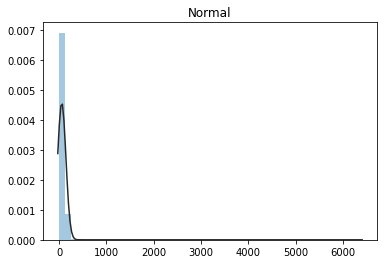

In [20]:
plt.figure(1)
plt.title('Normal')
sns.distplot(m, kde=False, fit=st.norm)

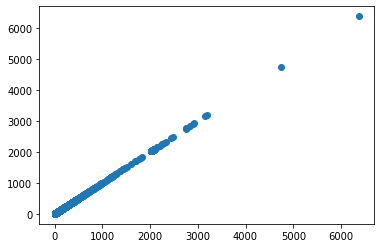

In [23]:
plt.scatter(m,m)
plt.show()

In [33]:
m[5]

71

In [47]:
from collections import Counter
mm = Counter(m)
#mtriple = sorted(mm, key=lambda x: x[1], reverse=False)

In [63]:
mm.most_common()

[(6, 2064),
 (5, 1611),
 (22, 1548),
 (24, 1452),
 (20, 1418),
 (8, 1373),
 (26, 1337),
 (18, 1318),
 (10, 1298),
 (12, 1294),
 (28, 1237),
 (14, 1169),
 (30, 1151),
 (16, 1137),
 (32, 1089),
 (11, 1027),
 (34, 1020),
 (21, 1016),
 (9, 1001),
 (19, 994),
 (13, 968),
 (7, 967),
 (40, 950),
 (23, 935),
 (38, 930),
 (15, 918),
 (36, 918),
 (25, 903),
 (42, 888),
 (27, 884),
 (17, 848),
 (46, 843),
 (48, 840),
 (44, 792),
 (29, 787),
 (31, 769),
 (50, 768),
 (52, 723),
 (54, 712),
 (58, 684),
 (56, 679),
 (35, 647),
 (33, 632),
 (37, 626),
 (60, 608),
 (62, 604),
 (39, 586),
 (66, 582),
 (64, 580),
 (68, 572),
 (45, 572),
 (74, 568),
 (41, 564),
 (72, 553),
 (70, 535),
 (47, 527),
 (76, 516),
 (78, 506),
 (43, 501),
 (49, 495),
 (80, 487),
 (51, 468),
 (86, 447),
 (55, 444),
 (94, 444),
 (84, 442),
 (61, 426),
 (57, 424),
 (92, 424),
 (82, 423),
 (88, 418),
 (67, 415),
 (65, 412),
 (59, 410),
 (53, 409),
 (96, 401),
 (90, 398),
 (63, 394),
 (77, 389),
 (69, 379),
 (71, 377),
 (75, 371),
 (

In [50]:
xx=[]
yy =[]
for k,v in mm.items():
    xx.append(k)
    yy.append(v)

In [51]:
xx[:5]

[40, 67, 54, 90, 69]

In [52]:
yy[:5]

[950, 415, 712, 398, 379]

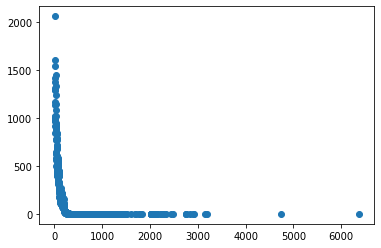

In [53]:
plt.scatter(xx,yy)
plt.show()

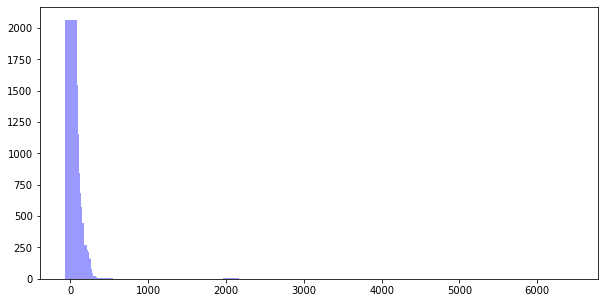

In [65]:
plt.figure(figsize=(10,5))
plt.bar(xx,yy,color = '#9999ff',width = 150) 
plt.show()